In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 5) # -4 ... 10 
print('SD:', SD)

SD: 0.016384000000000006


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'AMZN', 'ANET', 'APPH', 'ATVI', 'AXON', 'AYX', 
    'BILI', 'BYND', 'COUR','CPNG', 'DDOG', 'DOCU', 'DUOL', 'EDIT', 
    'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'INTG', 'ISRG', 'JD', 
    'LULU', 'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 'NVCR', 'OKTA', 
    'PANW', 'PINS', 'PTON', 'QDEL', 'RDFN', 'RGEN', 'ROKU', 'SE', 
    'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR', 
    'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

53

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 8, 20))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['TTD', 'TTWO', 'TWLO', 'TWTR', 'UPST', 'VEEV', 'ZEN', 'ZG', 'ZNGA', '^IXIC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  10 of 10 completed
Generating derived columns...
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...ZEN
   ...ZG
   ...ZNGA
   ...^IXIC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {
                str_to_tuple(k): v 
                for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data. '
              'Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {
            str(k): v 
            for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 TTD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 12.695142978069404
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 12.695142978069404
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 12.695142978069404
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_rel_minmax method...
------------------------------------

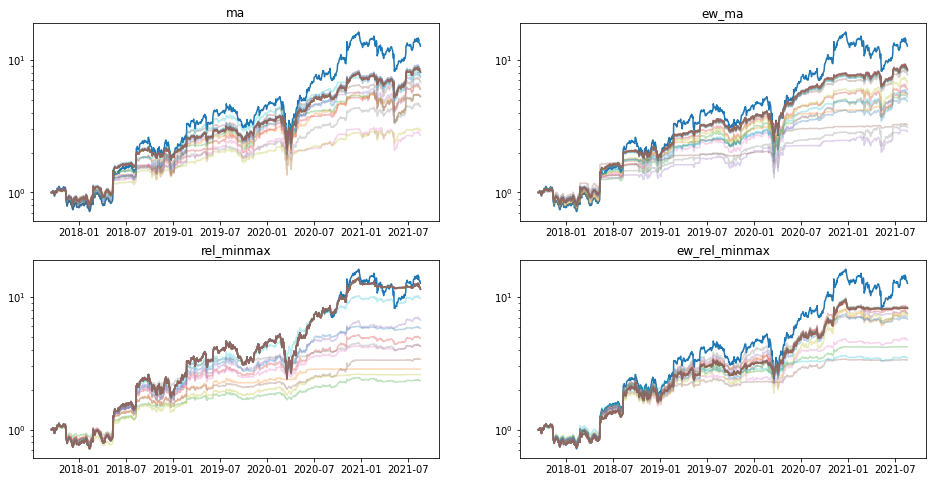

Saving TTD params...



----------------------------------------------------------------------
                                 TTWO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 13.066024291783995
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 13.066024291783995
Refitting current best...
Current best ew_ma returns: 16.049588274096983
Fraction Invested: 0.9985271288200009
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 16.04915737954186
Invested: 0.9985271288200009
New best: 16.220829273226613
Invested: 0.9985271288200009
New best: 16.22082788237281
Invested: 0.9985271288200009
New best: 16.22082788237281
Invested: 0.9985271288200009
New best: 16.

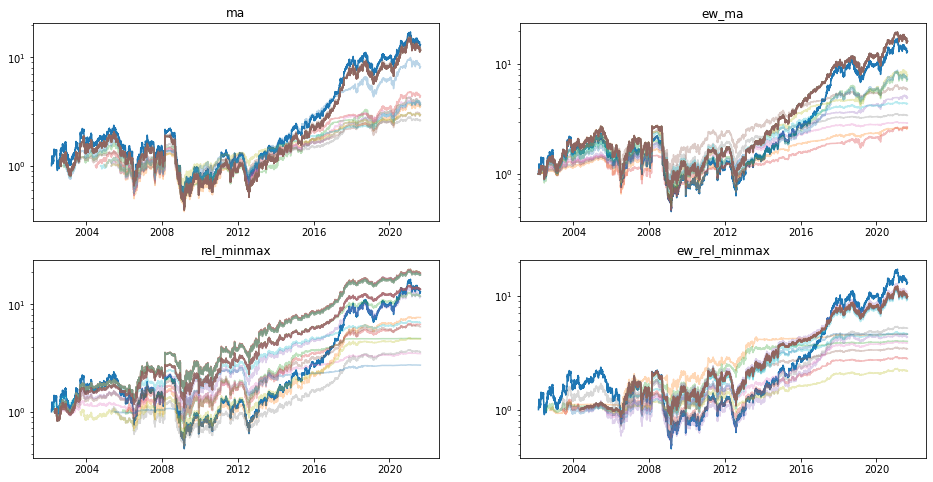

Saving TTWO params...



----------------------------------------------------------------------
                                 TWLO
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 11.73959382856249
Refitting current best...
Current best ma returns: 11.984296978974621
Fraction Invested: 0.9983182111541236
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 11.989961294529204
Invested: 0.9983182111541236
New best: 13.26305839273542
Invested: 0.9983182111541236
New best: 13.256275423887885
Invested: 0.9983182111541236
New best: 13.24728090093345
Invested: 0.9983182111541236
New best: 13.2477439340414
Invested: 0.9983182111541236
New best: 13.24532538292955
Invested: 0.9983182111541236
New best: 13.245235298725648
Invested: 0.9983182111541236
New best: 13.245235298725648
Invested: 0.9983182111541236
New best: 13.24187307532043

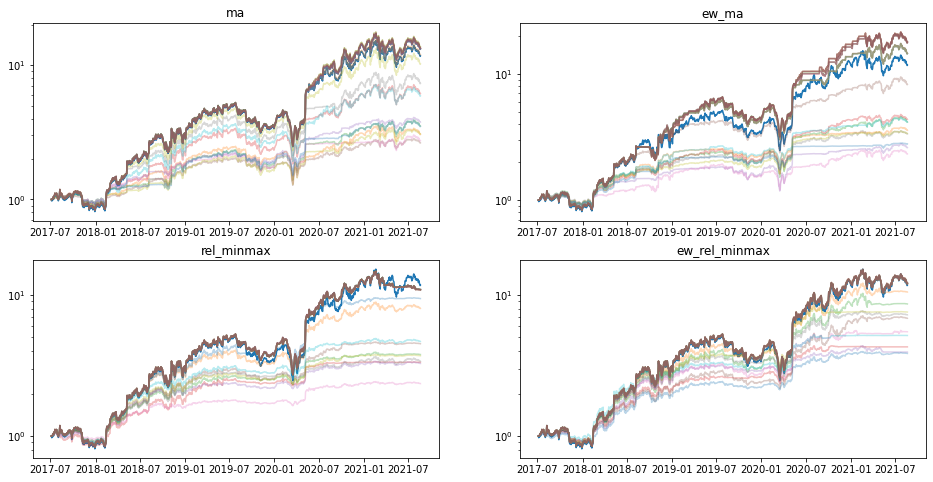

Saving TWLO params...



----------------------------------------------------------------------
                                 TWTR
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.693966623743079
Refitting current best...
Current best ma returns: 1.8448307856554298
Fraction Invested: 0.260629583536757
Beginning random search...
New best: 1.8634963342267745
Invested: 0.18669351229135667
Round: 10
Beginning adjusted search...
New best: 1.8790890288399633
Invested: 0.18669351229135667
New best: 1.8790890288399633
Invested: 0.18669351229135667
New best: 1.896812989194473
Invested: 0.18669351229135667
New best: 1.8948696075769704
Invested: 0.18669351229135667
New best: 1.8949426788268995
Invested: 0.18669351229135667
New best: 1.8949426788268995
Invested: 0.18669351229135667
New best: 1.8960462935584963
Invested: 0.18669351229135667
New best: 1.9057

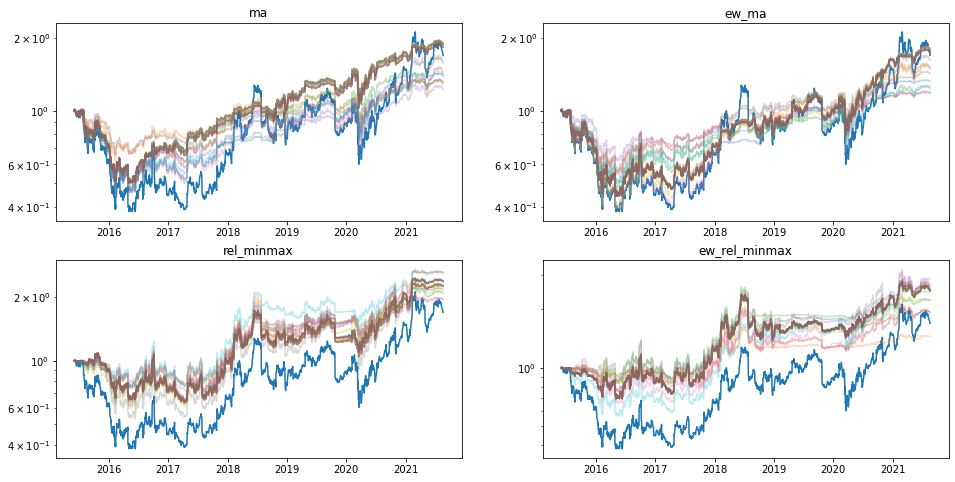

Saving TWTR params...



----------------------------------------------------------------------
                                 UPST
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 2.5766879402124774
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 107
Beginning adjusted search...
Round: 153 7 14


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 2.5766879402124774
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 102 6
Beginning adjusted search...
Round: 145 15


Beginning rel_minmax method...
--------------------------------------------------
Do nothing returns: 2.5766879402124774
Refitting current best...
Fraction Invested: 1
Beginning random search...
New best: 2.6263181770046544
Invested: 0.228480863676217
New best: 3.285478330444390

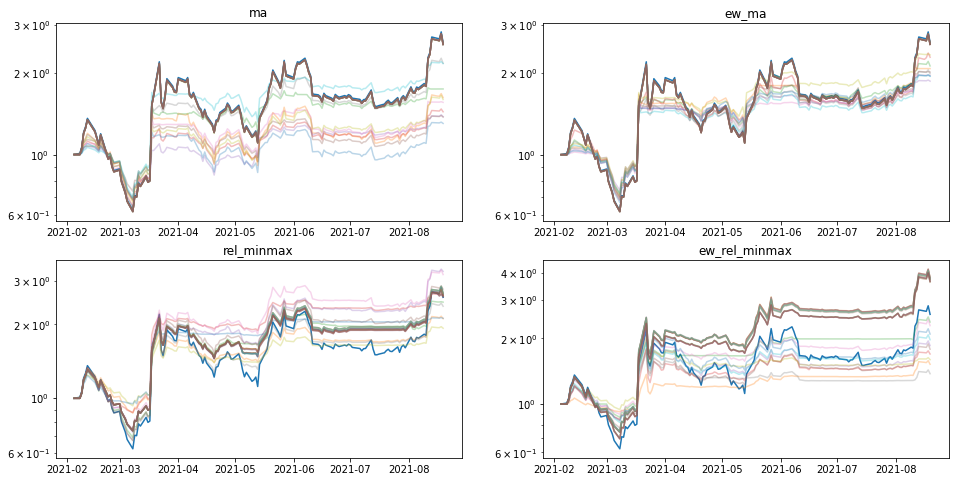

Saving UPST params...



----------------------------------------------------------------------
                                 VEEV
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 11.813081250500582
Refitting current best...
Fraction Invested: 1
Beginning random search...
Round: 10
Beginning adjusted search...
Round: 15


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 11.813081250500582
Refitting current best...
Current best ew_ma returns: 13.825460328599451
Fraction Invested: 0.9992558871258895
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 13.825561607921395
Invested: 0.9992558871258895
New best: 13.825479512385398
Invested: 0.9992558871258895
New best: 13.828974655706244
Invested: 0.9992558871258895
New best: 13.83362709912627
Invested: 0.9992558871258895
New best: 

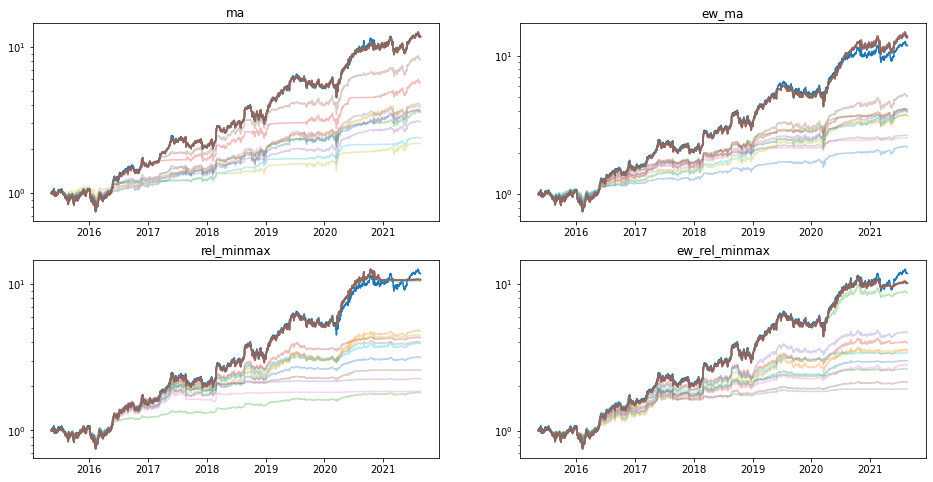

Saving VEEV params...



----------------------------------------------------------------------
                                 ZEN
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 6.12295917349525
Refitting current best...
Current best ma returns: 6.129553381721132
Fraction Invested: 0.9995279882427307
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 6.127869435688092
Invested: 0.9995279882427307
New best: 6.128059283741179
Invested: 0.9995279882427307
New best: 6.125786510059598
Invested: 0.9995279882427307
New best: 6.374472734360965
Invested: 0.9995279882427307
New best: 6.3747159691047806
Invested: 0.9995279882427307
New best: 6.374415892391563
Invested: 0.9995279882427307
New best: 6.370401382617995
Invested: 0.9985401829831597
New best: 6.375134008718604
Invested: 0.9985401829831597
New best: 6.125600846714357
Inve

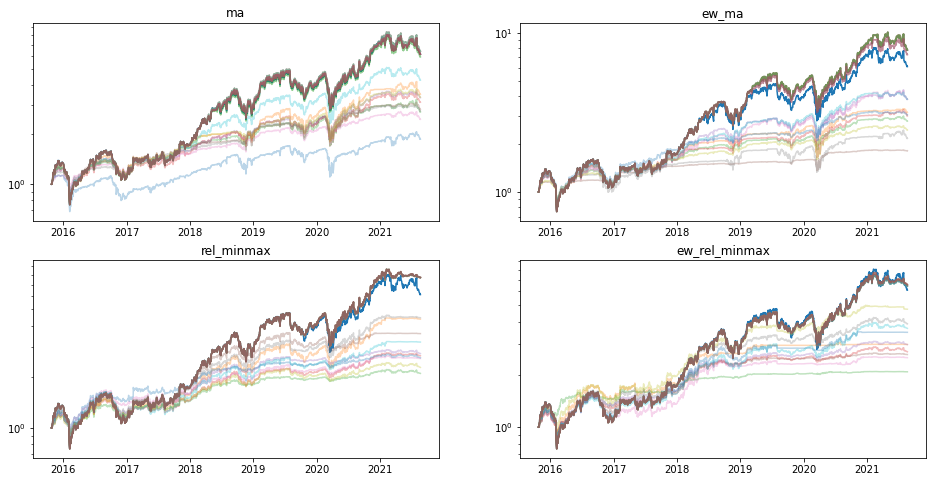

Saving ZEN params...



----------------------------------------------------------------------
                                 ZG
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 4.018958763410623
Refitting current best...
Current best ma returns: 4.196659438966087
Fraction Invested: 0.9996573336869761
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 4.194868190011881
Invested: 0.9996573336869761
New best: 4.194868190011881
Invested: 0.9996573336869761
New best: 4.1993212696877
Invested: 0.9996573336869761
New best: 4.1993212696877
Invested: 0.9996573336869761
New best: 4.198186793890621
Invested: 0.9996573336869761
New best: 4.2001553981328374
Invested: 0.9996573336869761
New best: 4.200197596264995
Invested: 0.9996573336869761
New best: 4.198630272125747
Invested: 0.9996573336869761
New best: 4.263051882012021
Invested:

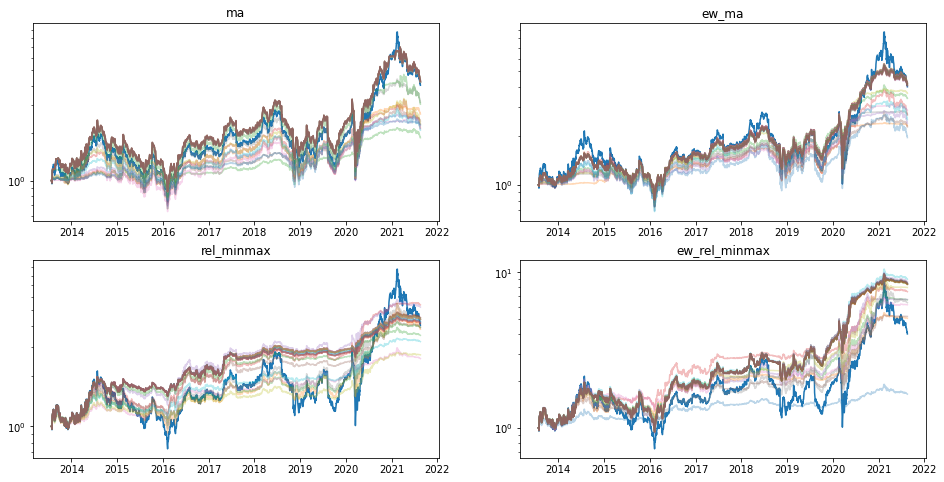

Saving ZG params...



----------------------------------------------------------------------
                                 ZNGA
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 1.9109588280518721
Refitting current best...
Current best ma returns: 2.183206843954564
Fraction Invested: 0.9997976350127153
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 2.1834889984830994
Invested: 0.9997976350127153
New best: 2.1838719037631664
Invested: 0.9997976350127153
New best: 2.168506918971962
Invested: 0.9997976350127153
New best: 2.1411009468172018
Invested: 0.9997976350127153
New best: 2.140231113355398
Invested: 0.9997976350127153
New best: 2.131569664186003
Invested: 0.9997976350127153
New best: 2.131178067553847
Invested: 0.9997976350127153
New best: 2.124655381305744
Invested: 0.9997976350127153
New best: 2.1633236074907054


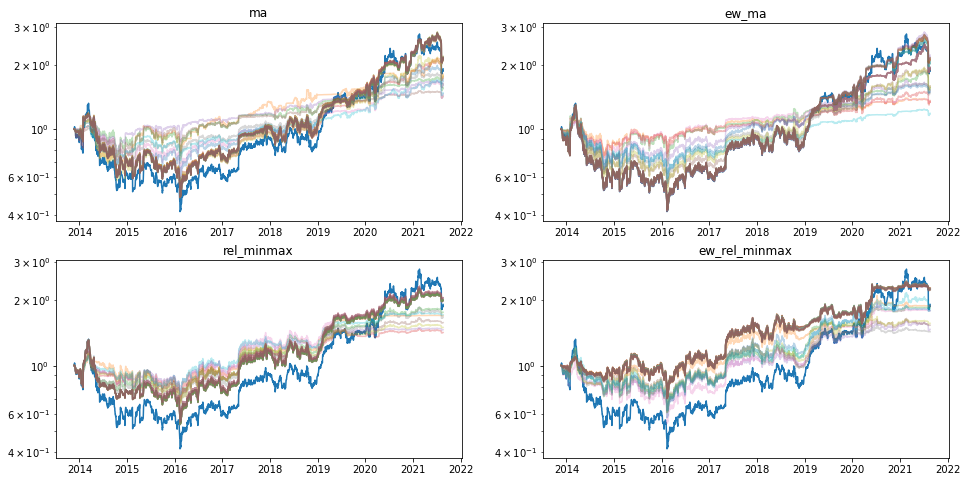

Saving ZNGA params...



----------------------------------------------------------------------
                                 ^IXIC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 34.96463152793863
Refitting current best...
Current best ma returns: 35.750219033965884
Fraction Invested: 0.9720331582370679
Beginning random search...
Round: 10
Beginning adjusted search...
New best: 35.572092612882656
Invested: 0.9720331582370679
New best: 35.59020496216739
Invested: 0.9720331582370679
New best: 35.588659425878376
Invested: 0.9720331582370679
New best: 35.59230387348644
Invested: 0.9720331582370679
New best: 35.5925835791626
Invested: 0.9720331582370679
New best: 35.710520698223675
Invested: 0.9720331582370679
New best: 35.57737950048575
Invested: 0.9720331582370679
New best: 35.57737950048575
Invested: 0.9720331582370679
New best: 35.59342039943411

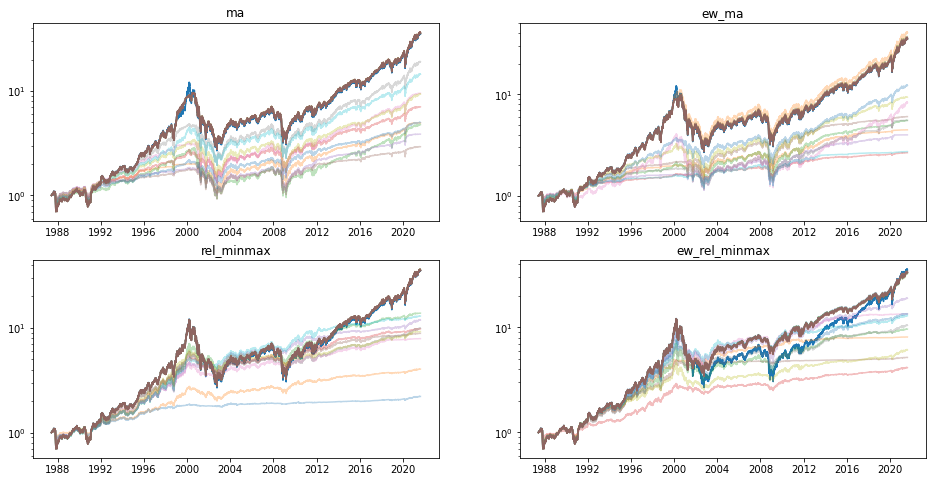

Saving ^IXIC params...


In [14]:
N_RAND = 10
N_ADJ = 15

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    try:
        best_params, best_returns = read_best_params(stock)
        stock_data = get_stock_data(stock, data)
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
        qp = QPercent(stock_data, 
                      N_CUTS, 
                      best_param_set=best_params, 
                      best_returns=best_returns, 
                      sd=SD)
        qp.run_sims(N_RAND, N_ADJ)
        best = get_best_param_set(qp)
        save_best_param_set(best, stock)
    except BaseException as e:
        print(f'Error encountered\n{e}')

In [15]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} '
                  f'({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            print('No data for', stock)
            continue
        except:
            print('Bad Data for', stock)
            continue

In [16]:
ALL = SYMBOLS + INDICES
#get_summary(ALL)
get_summary(batch)


TTD:
  Best Return: 12.695142978069404 (ma)
  100.00% in

TTWO:
  Best Return: 16.12757821201192 (ew_ma)
  99.85% in

TWLO:
  Best Return: 17.644145163870256 (ew_ma)
  99.82% in

TWTR:
  Best Return: 2.6138554772033933 (ew_rel_minmax)
  42.10% in

UPST:
  Best Return: 3.6542365581403438 (ew_rel_minmax)
  93.96% in

VEEV:
  Best Return: 13.487056624926302 (ew_ma)
  99.93% in

ZEN:
  Best Return: 7.746147241291335 (rel_minmax)
  16.82% in

ZG:
  Best Return: 8.576534181112319 (ew_rel_minmax)
  18.69% in

ZNGA:
  Best Return: 2.234348518256859 (ew_rel_minmax)
  11.82% in

^IXIC:
  Best Return: 35.79834448228309 (ma)
  97.20% in


In [17]:
!say qp is dunzo

IXIC: Nasdaq